In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

### Zbiór danych

In [ ]:
x, y = load_breast_cancer(return_X_y=True)

### Skalowanie do wartości z przedziału [0;1]

In [ ]:
x_norm = minmax_scale(x, axis=0)

### boxploty

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e38bafca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e38bd4280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e38bafaf0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3e38bd4820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e38bd4af0>,
 'means': []}

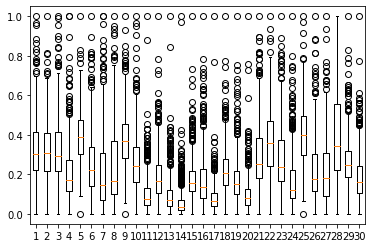

In [ ]:
plt.boxplot(x_norm)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e368a6ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e36835280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e368a69d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e36835820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e36835af0>],
 'means': []}

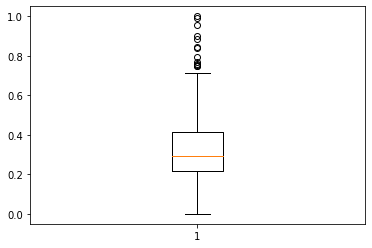

In [ ]:
plt.boxplot(x_norm[:,2])

### wyszukiwanie danych odstających (przykładowa metoda - Isolation Forest)

In [ ]:
IF = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')

In [ ]:
IF.fit(x_norm)

IsolationForest()

In [ ]:
if_results = IF.predict(x_norm)

In [ ]:
x_norm_wo = x_norm[if_results==1]

In [ ]:
outliers = x_norm[if_results==-1]

In [ ]:
x_norm_wo.shape

(508, 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e367b68e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e367b6e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e367b65e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e367c6460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e367c6730>],
 'means': []}

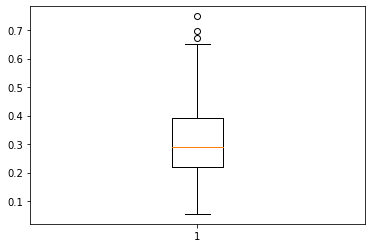

In [ ]:
plt.boxplot(x_norm_wo[:,2])

In [ ]:
min(x_norm_wo[:,2])

0.05473014995508263

### Uzupełnianie danych brakujących

In [ ]:
r = np.random.random(x_norm.shape)

In [ ]:
x_norm_wnans = np.where(r > 0.15, x_norm, np.NaN)

In [ ]:
simp = SimpleImputer(strategy='median')

In [ ]:
simp.fit(x_norm_wnans)

SimpleImputer(strategy='median')

In [ ]:
x_norm_2 = simp.transform(x_norm_wnans)

In [ ]:
x_norm_2 - x_norm

array([[ 0.        ,  0.        ,  0.        , ..., -0.57718213,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.31995025, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29769511,  0.        , -0.29991017, ..., -0.50020619,
        -0.15907747, -0.04912764],
       ...,
       [-0.15145061,  0.        ,  0.        , ..., -0.15243986,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.1951302 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Redukcja i ekstrakcja cech metodą PCA

In [ ]:
pca = PCA(n_components=10)

In [ ]:
pca.fit(x_norm)

PCA(n_components=10)

In [ ]:
x_norm_pca = pca.transform(x_norm)

In [ ]:
x_norm_pca.shape

(569, 10)

In [ ]:
pca.components_.shape

(10, 30)

In [ ]:
pca.components_[0]

array([ 2.42675774e-01,  9.64786101e-02,  2.52550175e-01,  2.16494530e-01,
        1.09694618e-01,  2.40397602e-01,  3.01914206e-01,  3.22475470e-01,
        1.11431911e-01,  4.32983397e-02,  1.21760615e-01, -3.91796003e-05,
        1.18580603e-01,  1.03569266e-01, -4.68418094e-03,  1.29319789e-01,
        6.56807080e-02,  1.24746120e-01,  1.44902467e-02,  4.55013416e-02,
        2.59386850e-01,  1.13833007e-01,  2.60708399e-01,  2.05917767e-01,
        1.23773566e-01,  2.04993413e-01,  2.44083623e-01,  3.71065064e-01,
        9.59229054e-02,  9.46335142e-02])

In [ ]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 , 0.07114442, 0.06411259, 0.04086072,
       0.03071494, 0.01580837, 0.01191472, 0.00988429, 0.00945446])

In [ ]:
pca2 = PCA(n_components=10)
pca2.fit(x_norm_wo)

PCA(n_components=10)

In [ ]:
x_norm_wo_pca = pca2.transform(x_norm_wo)

In [ ]:
pca.components_[0] - pca2.components_[0]

array([ 0.0004617 , -0.02036454,  0.0031195 ,  0.01370915, -0.00349078,
        0.01277297,  0.02082859,  0.00534697,  0.00445653,  0.01896329,
        0.02688448,  0.00731154,  0.03001476,  0.02894334,  0.0126049 ,
        0.02358104,  0.01166253,  0.00866573,  0.03197052,  0.01265078,
       -0.00443333, -0.03374799,  0.00050391,  0.01010482, -0.02882867,
       -0.00999084, -0.0121608 , -0.03003506, -0.0138413 , -0.00953426])

# Uczenie modeli - KLASYFIKACJA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### utworzenie modeli (przykład - algorytm k-najbbliższych sąsiadów)

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
kNN2 = KNeighborsClassifier(n_neighbors=10, weights='distance')
kNN3 = KNeighborsClassifier(n_neighbors=15, weights='distance')

### podział zbioru danych na treningowe i testowe metodą train_test_split

In [ ]:
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm, y, test_size=0.15, shuffle=True, stratify=y)

In [ ]:
y_norm_train.shape

(483,)

In [ ]:
y_norm_test.shape

(86,)

In [ ]:
sum(y_norm_train)/589

0.5144312393887945

### Dopasowanie modeli do danych treningowych

In [ ]:
kNN.fit(x_norm_train, y_norm_train)
kNN2.fit(x_norm_train, y_norm_train)
kNN3.fit(x_norm_train, y_norm_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

### predykcja danych testowych i ewaluacja modeli

In [ ]:
y_pred = kNN.predict(x_norm_test)

In [ ]:
kNN.score(x_norm_test, y_norm_test)

0.9767441860465116

In [ ]:
kNN.score(x_norm_train, y_norm_train)

1.0

In [ ]:
y_pred_proba = kNN.predict_proba(x_norm_test)

In [ ]:
y_pred_proba

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.20170214, 0.79829786],
       [0.        , 1.        ],
       [0.80934273, 0.19065727],
       [0.58679231, 0.41320769],
       [0.18379237, 0.81620763],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.59759108, 0.40240892],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [ ]:
kNN.kneighbors(x_norm_test)

(array([[0.28213544, 0.29169464, 0.31109017, 0.31949296, 0.32144259],
        [0.25072906, 0.25500195, 0.33826063, 0.38210589, 0.3837567 ],
        [0.26212837, 0.34484388, 0.34915116, 0.35635447, 0.37079248],
        [0.25341958, 0.27687369, 0.27731449, 0.2823136 , 0.29190372],
        [0.32278486, 0.33620237, 0.36884124, 0.37822593, 0.40874079],
        [0.24905036, 0.29196542, 0.30907733, 0.31581723, 0.32145512],
        [0.38888191, 0.41470845, 0.41752548, 0.435971  , 0.46795621],
        [0.29451186, 0.29520494, 0.29561045, 0.29807622, 0.30545077],
        [0.38238101, 0.41247445, 0.43832056, 0.45686567, 0.45779263],
        [0.46405842, 0.48094212, 0.53460674, 0.53674198, 0.542536  ],
        [0.43561744, 0.47978153, 0.50637643, 0.50970167, 0.51432412],
        [0.26108382, 0.34441114, 0.36443105, 0.36479867, 0.37092978],
        [0.61089405, 0.79145792, 0.80718797, 0.86329132, 0.91072189],
        [0.38657124, 0.40367148, 0.42519713, 0.45306095, 0.47688747],
        [0.35481402,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
print('accuracy: ', accuracy_score(y_norm_test, y_pred))
print('precision: ', precision_score(y_norm_test, y_pred))
print('recall: ', recall_score(y_norm_test, y_pred))
print('f1-score: ', f1_score(y_norm_test, y_pred))

accuracy:  0.9767441860465116
precision:  0.9814814814814815
recall:  0.9814814814814815
f1-score:  0.9814814814814815


In [ ]:
confusion_matrix(y_norm_test, y_pred)

array([[31,  1],
       [ 1, 53]])

# Uczenie Modeli - REGRESJA

### utworzenie sztucznego zbioru danych

In [ ]:
xr = np.sort(10*np.random.rand(30))

In [ ]:
yr = np.sin(xr) + 0.5*(0.5-np.random.rand(30))

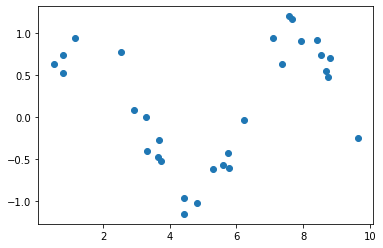

In [ ]:
plt.scatter(xr, yr)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### utworzenie modeli (przykład - k-najbliżzych sąsiadów)

In [ ]:
kNR = KNeighborsRegressor(n_neighbors=3, weights='uniform')
kNR2 = KNeighborsRegressor(n_neighbors=3, weights='distance')

In [ ]:
xr = xr.reshape(-1, 1)

In [ ]:
xr.shape

(30, 1)

### dopasowanie modeli do danych treningowych

In [ ]:
kNR.fit(xr, yr)
kNR2.fit(xr, yr)

KNeighborsRegressor(n_neighbors=3, weights='distance')

utworzenie zbioru testowego

In [ ]:
xr_test = np.linspace(0, 10, 200)
yr_test = np.sin(xr_test)
xr_test = xr_test.reshape(-1, 1)
yr_pred = kNR.predict(xr_test)
yr_pred2 = kNR2.predict(xr_test)

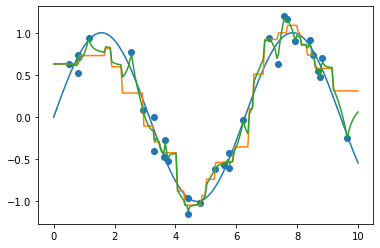

In [ ]:
plt.scatter(xr, yr)
plt.plot(xr_test[:,0], yr_test)
plt.plot(xr_test[:,0], yr_pred)
plt.plot(xr_test[:,0], yr_pred2)

Ewaluacja modeli regresji

In [ ]:
print('MSE kNR:  ', mean_squared_error(yr_test, yr_pred))
print('MSE kNR2: ', mean_squared_error(yr_test, yr_pred2))

MSE kNR:   0.06081534506408302
MSE kNR2:  0.03302386982202301


In [ ]:
print('r2 kNR:  ', kNR.score(xr_test, yr_test))
print('r2 kNR2: ', kNR2.score(xr_test, yr_test))

r2 kNR:   0.8625874565751432
r2 kNR2:  0.925382418841925


# OPTYMALIZACJA HIPERPARAMETRÓW (przykład dla modeli klasyfikacji)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ('uniform', 'distance'), 'p': [1,2,3]}

In [ ]:
gskNN = GridSearchCV(kNN, param_grid, cv=5)

In [ ]:
gskNN.fit(x_norm, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3], 'weights': ('uniform', 'distance')})

In [ ]:
gskNN.score(x_norm, y)

1.0

In [ ]:
gskNN.cv_results_

{'mean_fit_time': array([0.00085425, 0.00099001, 0.00095701, 0.00061822, 0.00078526,
        0.00085645, 0.00080252, 0.00069036, 0.0005909 , 0.00059648,
        0.00076375, 0.00081115, 0.00072994, 0.00062513, 0.00082655,
        0.00062141, 0.00077462, 0.00082102, 0.00074201, 0.00064993,
        0.00062671, 0.00060954, 0.00089364, 0.0009511 , 0.00074506,
        0.00065699, 0.00065475, 0.00061159, 0.00078449, 0.00078621,
        0.00077901, 0.00076809, 0.0009038 , 0.00066099, 0.00080695,
        0.00072513, 0.00070133, 0.00062995, 0.00102854, 0.00060368,
        0.00073228, 0.00080085, 0.00069485, 0.00067129, 0.00065274,
        0.00066509, 0.00078149, 0.00084023, 0.00078807, 0.00069022,
        0.00071359, 0.00069928, 0.00077505, 0.00098152, 0.00081773,
        0.00069838, 0.0007525 , 0.00066261, 0.00068326, 0.00069914]),
 'std_fit_time': array([1.20621423e-04, 2.99150623e-05, 2.00913570e-04, 4.72749835e-05,
        1.12286454e-04, 8.29414890e-05, 8.75102071e-05, 1.38694840e-04,
     

In [ ]:
gskNN.best_estimator_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'distance'}

In [ ]:
gskNN.best_score_

0.9701443875174661

In [ ]:
gskNN.best_params_

{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

### Ocena modeli metodą walidacji krzyżowej

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(kNN, x_norm, y, cv=10)

In [ ]:
print('mean:', cv_scores.mean(), 'std:', cv_scores.std())

mean:  0.9666353383458647 std:  0.022785512217752144


## krzywe ROC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

In [ ]:
y_norm_pred = kNN.predict_proba(x_norm_test)

In [ ]:
y_norm_pred[:,1]

array([1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.79829786, 1.        , 0.19065727,
       0.41320769, 0.81620763, 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.40240892, 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       0.2115782 , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.20699432, 1.        ,
       0.        , 0.18509307, 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.77992902, 0.        , 0.        ,
       0.17998086, 0.81231598, 0.78938945, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
rc = roc_curve(y_norm_test, y_norm_pred[:, 1])

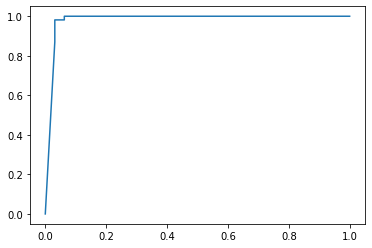

In [ ]:
plt.plot(rc[0], rc[1])

In [ ]:
auc(rc[0], rc[1])

0.9817708333333334

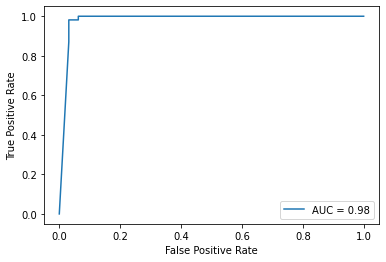

In [ ]:
RocCurveDisplay(fpr=rc[0], tpr=rc[1], roc_auc=auc(rc[0], rc[1])).plot()

# Zespoły klasyfikatorów - przykład Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vc = VotingClassifier(estimators=[('knn1', kNN), ('knn2', kNN2), ('knn3', kNN3)], voting='hard')

In [ ]:
vc.fit(x_norm_train, y_norm_train)

VotingClassifier(estimators=[('knn1', KNeighborsClassifier(weights='distance')),
                             ('knn2',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance')),
                             ('knn3',
                              KNeighborsClassifier(n_neighbors=15,
                                                   weights='distance'))])

In [ ]:
vc.score(x_norm_test, y_norm_test)

0.9883720930232558

In [ ]:
kNN3.score(x_norm_test, y_norm_test)

0.9767441860465116